In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig
import seaborn as sns

In [90]:
data=np.array([[3,4],[4,5],[6,9],[8,12]])

In [91]:
data=pd.DataFrame(data,columns=["col1","col2"])

In [92]:
data

,col1,col2
0,3,4
1,4,5
2,6,9
3,8,12


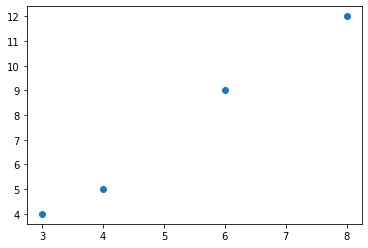

In [93]:
plt.scatter(data["col1"],data["col2"])

we have to find out :
1.  standardization of data
2.  covariance matrix
3.  eig value and eigen matrix
4.  find principle component

# calculating scaled data manually

In [94]:
data

,col1,col2
0,3,4
1,4,5
2,6,9
3,8,12


In [95]:
meanbycol=np.mean(data,axis=0)

In [96]:
meanbycol

col1    5.25
col2    7.50
dtype: float64

In [97]:
stdbycol=np.std(data,axis=0)

In [98]:
stdbycol

col1    1.920286
col2    3.201562
dtype: float64

In [99]:
scaled_by_mean=data-meanbycol

In [100]:
scaled_data=scaled_by_mean/stdbycol

In [101]:
scaled_data

,col1,col2
0,-1.171700,-1.093216
1,-0.650945,-0.780869
2,0.390567,0.468521
3,1.432078,1.405564


# Calculating scaled data by standard scaler

In [102]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [103]:
scaler.fit_transform(data)

array([[-1.1717002 , -1.09321633],
       [-0.65094455, -0.78086881],
       [ 0.39056673,  0.46852129],
       [ 1.43207802,  1.40556386]])

In [104]:
#covariance matrix
cov_mat=np.cov(scaled_data.T)

In [105]:
cov_mat

array([[1.33333333, 1.32836334],
       [1.32836334, 1.33333333]])

In [106]:
##eigen value and eigen vector
eig_val,eig_vec=np.linalg.eig(cov_mat)

In [107]:
eig_val

array([2.66169668, 0.00496999])

In [108]:
eig_vec

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [109]:
##Calculating PCA manually
eig_vec.T.dot(scaled_data.T).T

array([[-1.60153784,  0.05549647],
       [-1.01244494, -0.09187032],
       [ 0.60746696,  0.05512219],
       [ 2.00651581, -0.01874835]])

# Calculating PCA

In [110]:
from sklearn.decomposition import PCA
pca=PCA()

In [111]:
data=pca.fit_transform(scaled_data)

In [112]:
data

array([[-1.60153784, -0.05549647],
       [-1.01244494,  0.09187032],
       [ 0.60746696, -0.05512219],
       [ 2.00651581,  0.01874835]])

In [113]:
pd.DataFrame(data,columns=['pca1','pca2'])

,pca1,pca2
0,-1.601538,-0.055496
1,-1.012445,0.091870
2,0.607467,-0.055122
3,2.006516,0.018748


In [114]:
#pca.inverse_transform(data)

In [115]:
pca.explained_variance_ratio_

array([0.99813625, 0.00186375])

In [116]:
0.99813625 + 0.00186375

1.0

# implementing PCA on breast cancer dataset

In [117]:
from sklearn.datasets import load_breast_cancer

In [118]:
# instantiating
cancer = load_breast_cancer()

In [119]:
# creating dataframe
df = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])

In [120]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [121]:
df.shape

(569, 30)

In [122]:
from sklearn.preprocessing import StandardScaler

In [123]:
scaler=StandardScaler()

In [124]:
scaled_data=scaler.fit_transform(df)

In [125]:
scaled_df=pd.DataFrame(scaled_data,columns=df.columns)

In [126]:
scaled_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [127]:
# Importing PCA
from sklearn.decomposition import PCA

In [155]:
pca = PCA()

In [156]:
pca_df=pca.fit_transform(scaled_data)

In [157]:
pca_df

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
        -3.39144536e-02,  4.56477199e-02, -4.71692081e-02],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
         3.26241827e-02, -5.68742432e-03, -1.86787626e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
         4.70258247e-02,  3.14589659e-03,  7.50534755e-04],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
        -2.57775589e-03,  6.70621179e-03,  3.77041667e-03],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
        -6.80863833e-02, -8.41632764e-02, -2.37828222e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
        -9.51587894e-03, -6.09131090e-02, -1.94755854e-02]])

In [158]:
pca_df.shape

(569, 30)

In [159]:
pca_df=pd.DataFrame(data=pca_df)

In [160]:
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,...,0.096515,0.068850,0.084519,-0.175256,-0.151020,-0.201503,-0.252585,-0.033914,0.045648,-0.047169
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,...,-0.077327,-0.094578,-0.217718,0.011290,-0.170510,-0.041129,0.181270,0.032624,-0.005687,-0.001868
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,...,0.311067,-0.060309,-0.074291,0.102762,0.171158,0.004735,0.049569,0.047026,0.003146,0.000751
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,...,0.434193,-0.203266,-0.124105,0.153430,0.077496,-0.275225,0.183462,0.042484,-0.069295,-0.019937
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,...,-0.116545,-0.017650,0.139454,-0.005332,0.003062,0.039254,0.032168,-0.034786,0.005038,0.021214


In [164]:
# components
pca.components_

array([[ 2.18902444e-01,  1.03724578e-01,  2.27537293e-01,
         2.20994985e-01,  1.42589694e-01,  2.39285354e-01,
         2.58400481e-01,  2.60853758e-01,  1.38166959e-01,
         6.43633464e-02,  2.05978776e-01,  1.74280281e-02,
         2.11325916e-01,  2.02869635e-01,  1.45314521e-02,
         1.70393451e-01,  1.53589790e-01,  1.83417397e-01,
         4.24984216e-02,  1.02568322e-01,  2.27996634e-01,
         1.04469325e-01,  2.36639681e-01,  2.24870533e-01,
         1.27952561e-01,  2.10095880e-01,  2.28767533e-01,
         2.50885971e-01,  1.22904556e-01,  1.31783943e-01],
       [-2.33857132e-01, -5.97060883e-02, -2.15181361e-01,
        -2.31076711e-01,  1.86113023e-01,  1.51891610e-01,
         6.01653628e-02, -3.47675005e-02,  1.90348770e-01,
         3.66575471e-01, -1.05552152e-01,  8.99796818e-02,
        -8.94572342e-02, -1.52292628e-01,  2.04430453e-01,
         2.32715896e-01,  1.97207283e-01,  1.30321560e-01,
         1.83848000e-01,  2.80092027e-01, -2.19866379e-

In [166]:
var=pca.explained_variance_ratio_

In [167]:
var

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [168]:
max(var)

0.4427202560752635

In [169]:
min(var)

4.434827427366887e-06

In [170]:
sorted(var,reverse=True)

[0.4427202560752635,
 0.18971182044033083,
 0.0939316325743137,
 0.06602134915470156,
 0.05495768492346269,
 0.04024522039883349,
 0.02250733712982507,
 0.01588723800021328,
 0.01389649374559109,
 0.011689781894131482,
 0.009797189875980168,
 0.008705379007378835,
 0.008045249871967305,
 0.005233657454926352,
 0.003137832167627403,
 0.0026620933651523163,
 0.0019799679253242708,
 0.001753959450226359,
 0.0016492530592251628,
 0.0010386467483387049,
 0.0009990964637002523,
 0.0009146467510543462,
 0.0008113612588991052,
 0.0006018335666716714,
 0.0005160423791651879,
 0.00027258799547750075,
 0.00023001546250596422,
 5.297792903809423e-05,
 2.496010324687652e-05,
 4.434827427366887e-06]

In [172]:
sum(sorted(var,reverse=True)[:6])*100

88.75879635669057

In [173]:
sum(sorted(var,reverse=True)[:7])*100

91.00953006967309

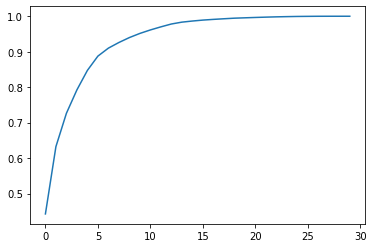

In [171]:
plt.plot(np.cumsum(var))
plt.show()